In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
train.shape

(90615, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [5]:
train.drop(columns=['id'], inplace = True)
y = train['Rings']
train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
# print datatype of dataframe
set(train.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [7]:
# we do not have null value
# data type -> int, float, object 

<Axes: >

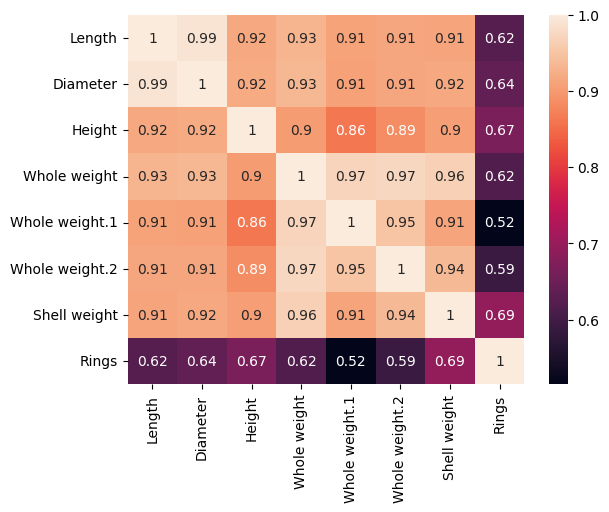

In [8]:
sns.heatmap(train.select_dtypes(include = ['float64', 'int64']).corr(), annot=True)

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

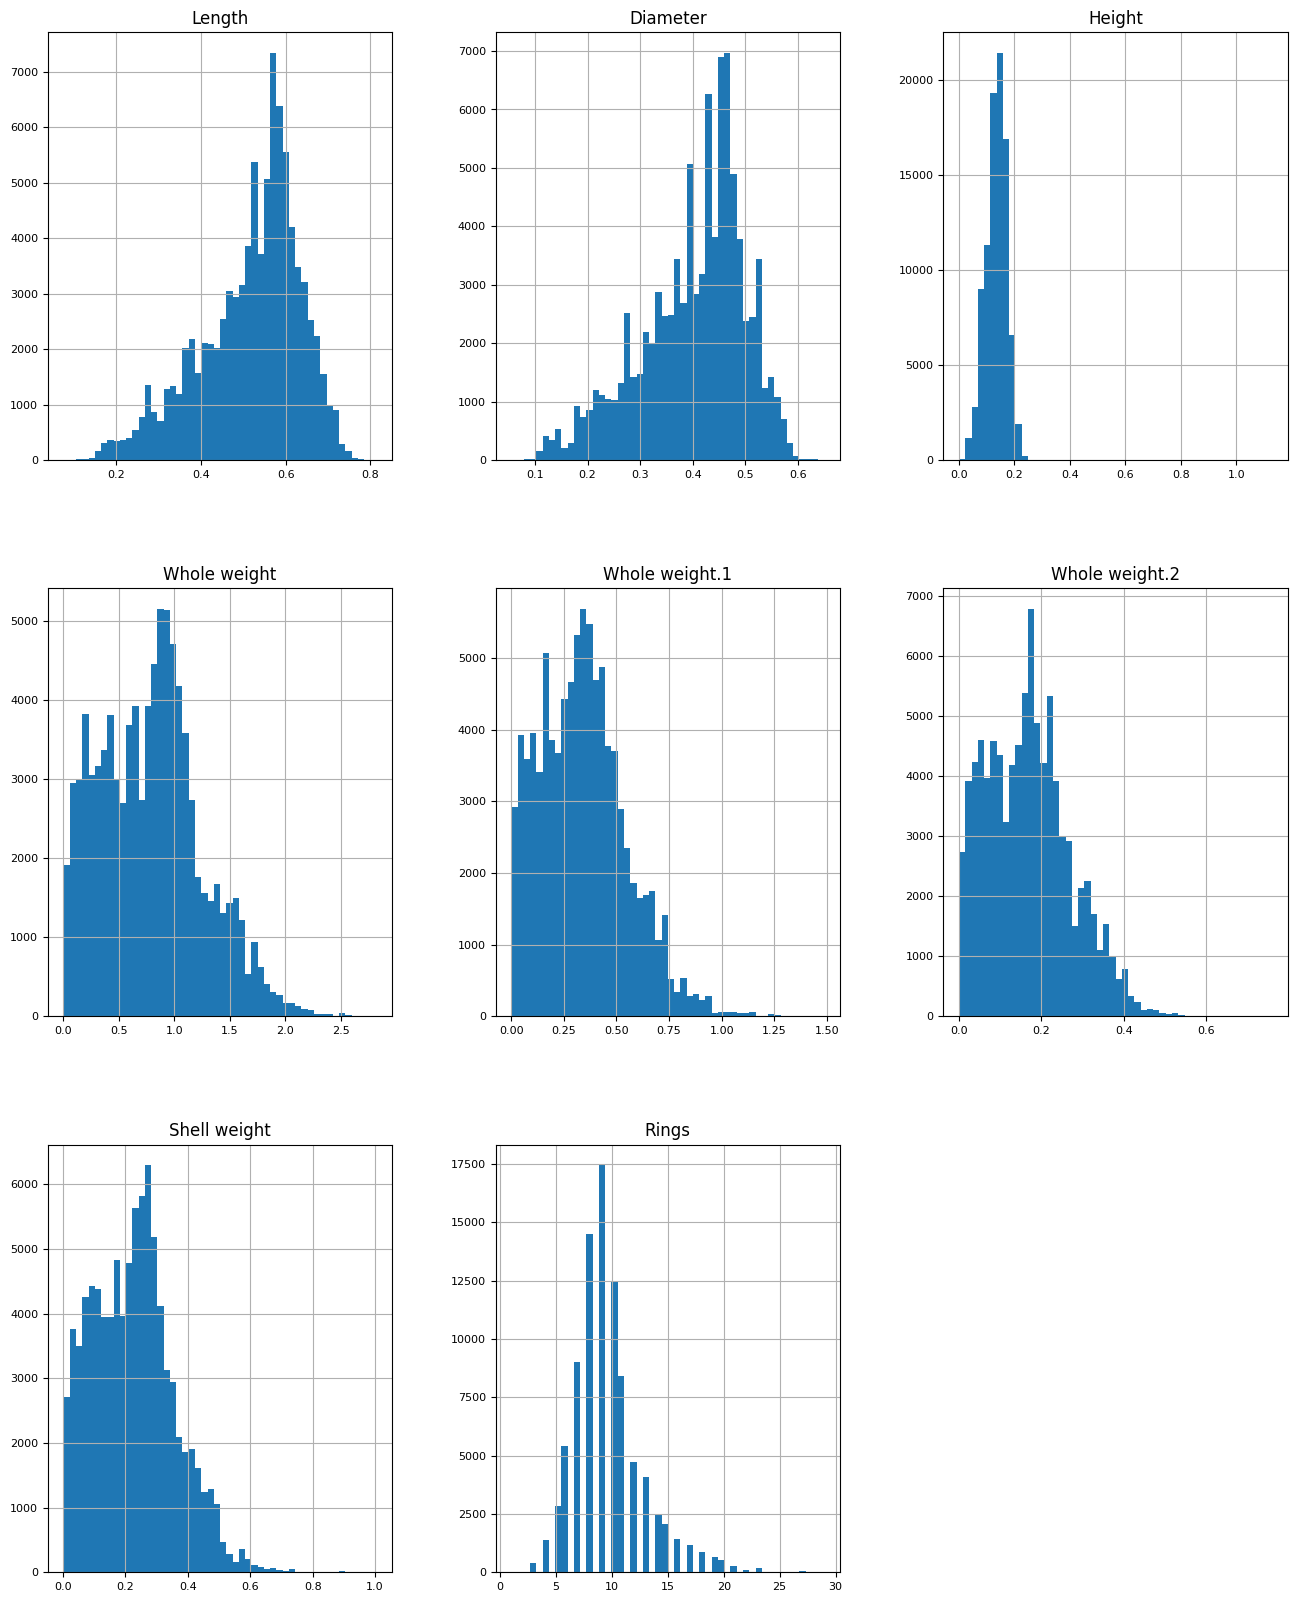

In [9]:
train.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# We can do the log transformation to see whether the correlation increase. If yes, then save it. We use the log transform.

<Axes: >

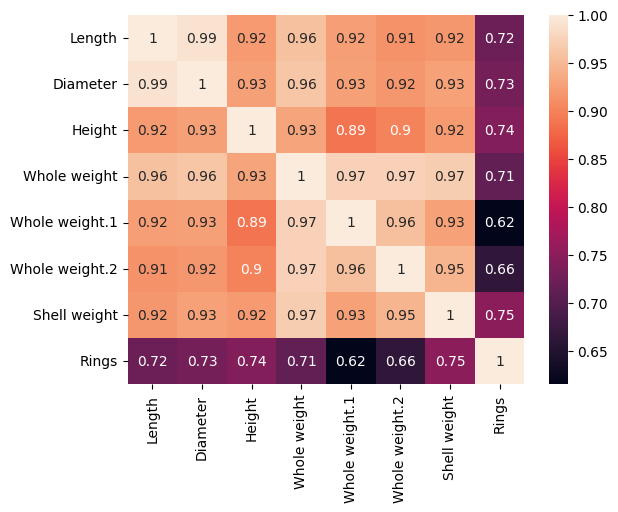

In [10]:
log_transformed = np.log1p(train.select_dtypes(include = ['float64', 'int64']))
sns.heatmap(log_transformed.corr(), annot=True)

# we can see that there are some improvement. We plot a graph to see the result.

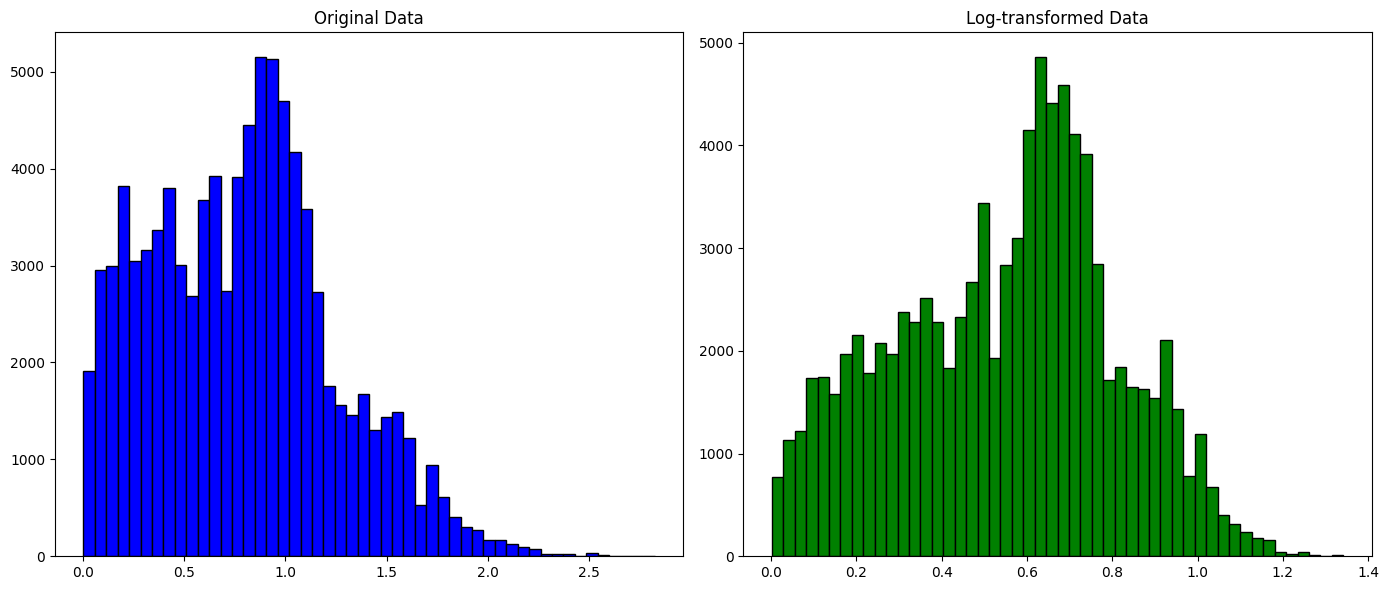

In [11]:
original_data = train['Whole weight']
transformed_data = np.log1p(original_data)
# Plotting the original data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = original data
plt.hist(original_data, bins=50, color='blue', edgecolor='black')
plt.title('Original Data')

# Plotting the log-transformed data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = transformed data
plt.hist(transformed_data, bins=50, color='green', edgecolor='black')
plt.title('Log-transformed Data')

# Show the plot
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

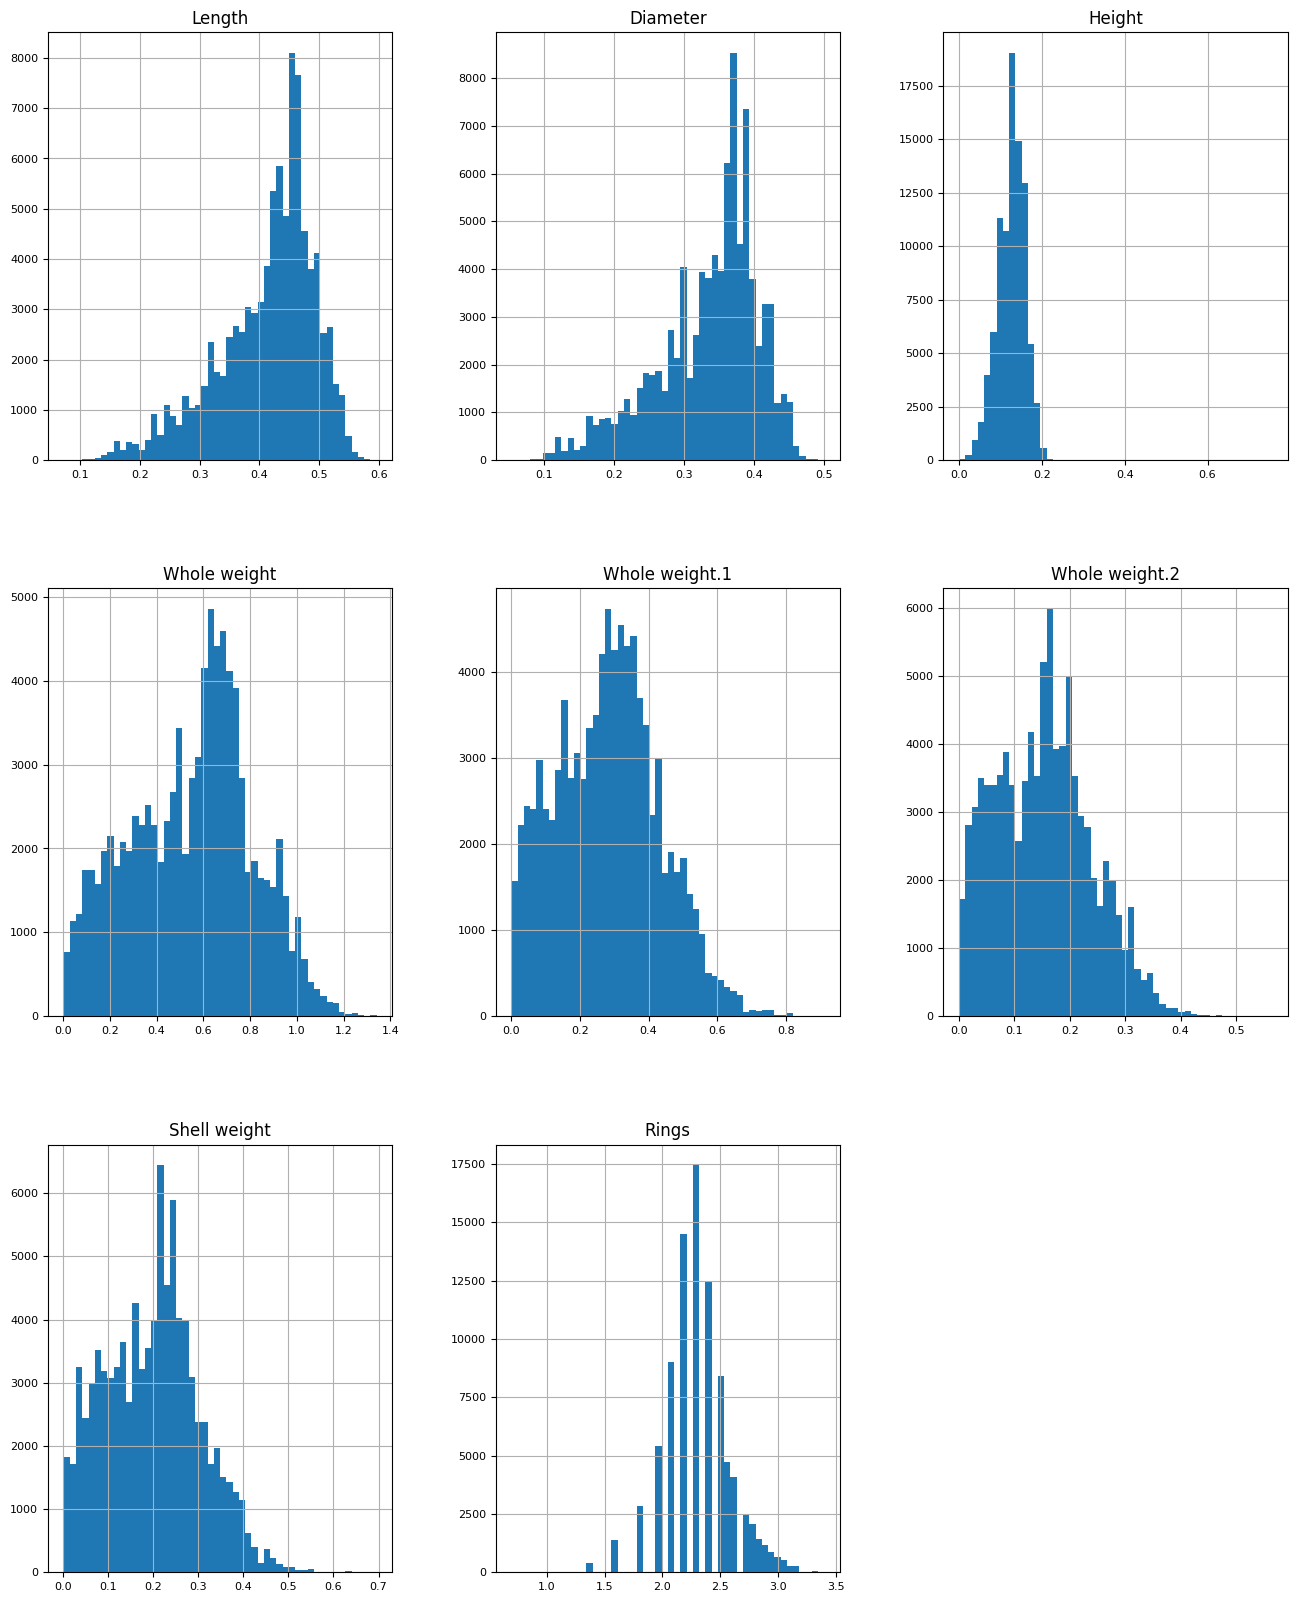

In [12]:
log_transformed.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
# normalization

# copy the data 
train_max_scaled = log_transformed.copy() 
  
# apply normalization techniques 
for column in train_max_scaled.columns: 
    train_max_scaled[column] = train_max_scaled[column]  / train_max_scaled[column].abs().max() 
     
# remove target columns
train_max_scaled.drop(columns=['Rings'], inplace=True)
# we already save the target columns in variable y


In [14]:
# combine the numerical data and catigorical data
cat_data = train.select_dtypes(include = ['O'])
combine_data = pd.concat([train_max_scaled, cat_data], axis=1)
combine_data.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex
0,0.735222,0.714241,0.184840,0.426199,0.311637,0.241837,0.309226,F
1,0.819648,0.796317,0.179078,0.563560,0.413685,0.431834,0.399100,F
2,0.248991,0.208397,0.032657,0.015490,0.006018,0.005299,0.007170,I
3,0.783233,0.776113,0.184840,0.484059,0.349780,0.330603,0.320773,M
4,0.740625,0.707247,0.161637,0.430604,0.344984,0.262544,0.259092,I


# Baseline

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

combine_data["Sex"] = combine_data["Sex"].astype("category")
x_train, x_test, y_train, y_test = train_test_split(combine_data, y, test_size=0.2, random_state=42, shuffle=True)
# Initialize the XGBRegressor model
xgbrModel = xgb.XGBRegressor(random_state=42, enable_categorical=True)

# Fit the model on the training data
xgbrModel.fit(x_train, y_train)

# Predict on the training data
predicted_train = xgbrModel.predict(x_train)

# Predict on the test data
predicted_test = xgbrModel.predict(x_test)

# Evaluate the model
msle_train = np.sqrt(mean_squared_log_error(y_train, predicted_train))
msle_test = np.sqrt(mean_squared_log_error(y_test, predicted_test))

# Print the evaluation results
print(f"Mean Squared Log Error on Training Data: {msle_train}")
print(f"Mean Squared Log Error on Test Data: {msle_test}")

Mean Squared Log Error on Training Data: 0.1366778568364343
Mean Squared Log Error on Test Data: 0.15283478468250958


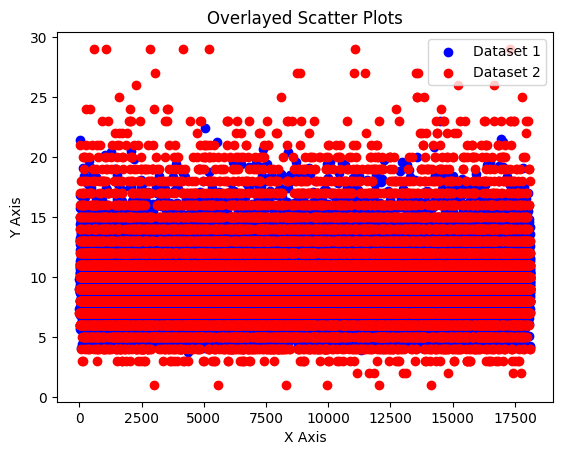

In [16]:
# Create the plot
plt.scatter(range(len(predicted_test)), predicted_test, color='blue', label='Dataset 1')
plt.scatter(range(len(y_test)), y_test, color='red', label='Dataset 2')

# Add title and labels
plt.title('Overlayed Scatter Plots')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add legend
plt.legend()

# Show the plot
plt.show()

# see whether gridsearch improve the performance

In [17]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': [100, 200, 300]
        }
# Create a basic model
xgb_model = xgb.XGBRegressor(random_state=42, enable_categorical=True, tree_method='hist', device="cuda")

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Assuming X_train and y_train are your data
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# The best estimator can then be retrieved
best_xgb_model = grid_search.best_estimator_

# The best score and parameters can also be retrieved
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:13:32] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best score: -3.406154693170453
Best parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 300, 'subsample': 1.0}


In [18]:
# Predict on the training data
predicted_train = grid_search.predict(x_train)

# Predict on the test data
predicted_test = grid_search.predict(x_test)

# Evaluate the model
msle_train = np.sqrt(mean_squared_log_error(y_train, predicted_train))
msle_test = np.sqrt(mean_squared_log_error(y_test, predicted_test))

# Print the evaluation results
print(f"Mean Squared Log Error on Training Data: {msle_train}")
print(f"Mean Squared Log Error on Test Data: {msle_test}")

Mean Squared Log Error on Training Data: 0.14506552232270065
Mean Squared Log Error on Test Data: 0.15236168662834795


In [19]:
test = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")
test.drop(columns=['id'], inplace=True)
test["Sex"] = test["Sex"].astype("category")
test = pd.concat([test.iloc[:, 1:], test.iloc[:, 0]], axis=1)
test

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,M
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,M
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,M
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,M
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,I
...,...,...,...,...,...,...,...,...
60406,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,I
60407,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,F
60408,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,I
60409,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,F


In [20]:
pred = grid_search.predict(test)

In [21]:
pred

array([ 9.685153, 11.519089, 13.12551 , ..., 11.593156,  9.058363,
       13.082909], dtype=float32)

In [22]:
# submission
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e4/sample_submission.csv")
submission = pd.DataFrame({
    'id': sample_submission.id,
    'Rings': pred
})

submission.to_csv('submission.csv', index=False)
submission.head(10)

,id,Rings
0,90615,9.685153
1,90616,11.519089
2,90617,13.125510
3,90618,14.081924
4,90619,11.240206
5,90620,12.836498
6,90621,13.637385
7,90622,6.043584
8,90623,16.574062
9,90624,9.522844
